# Decision Trees

kita akan lakukan klasifikasi dengan menggunakan algoritma D-Tree. Kita akan buat model dari data historis pasien.

Kita **import library** terlebih dahulu:

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Kita punya data dari semua pasien yang punya penyakit yang sama namun mereka di treatmen dengan obat yang berbeda-beda. Ada yang cocok obat A, ada yang cocok obat B, obat C, dst. Tugas kita adalah buat model yang tepat supaya digunakan untuk prediksi pasien-pasien di masa depan dengan penyakit yang sama. Data2 pasien berisi umur (Age), jenis kelamin (Sex), tekanan darah (Blood Pressure), dan kolesterol (Cholesterol).

Kalau data sampelnya dalam bentuk klasifikasi biner, maka kita dapat menggunakan algoritma D-Tree untuk prediksi kelas dari pasien di masa mendatang.

Untuk kasus ini, kita butuh untuk download contoh dataset. Datasetnya kita ambil dari IBM Object Storage.
Link: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

Kita baca file csv dengan **dataframe pandas**:

In [2]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Pre-processing

Kita beri nama **my_data** untuk nyalin data dari drug.csv dengan 2 variabel utama **X** sebagai **Feature Matrix** dan **y** sebagai **response vector (target)**.
Berhubung kolom lain tidak semua berisi nilai numerik, jadi kita harus ubah dulu ke nilai numerik, atau terpaksa kita drop/hapus.

In [3]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Pada **Sklearn Decision Trees** tidak bisa menangani variabel yang kategorial, maka kita harus konversi nilai-nilai kategorial dengan **pandas.get_dummies()**.

In [4]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Menambahkan satu kolom dengan nama **Drug**

In [5]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

# Setting Decision Tree

Kita mulai dengan **import**.

In [6]:
from sklearn.model_selection import train_test_split

**train_test_split** akan berisi 4 parameter. Kita beri nama:
X_trainset, X_testset, y_trainset, y_testset

**train_test_split** butuh nilai parameter:
X, y, test_size=0.3, and random_state=3.

Nilai **X** dan **y** bentuknya array dan dibutuhkan sebelum di-**split**.
**test_size** adalah rasio dari dataset testing, dan **random_state** untuk memastikan apakah sudah dipisahkan **(split)** dengan sama.

In [7]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Modeling

Pertama, kita buat *instance* dari **DecisionTreeClassifier** dan kita namakan **drugTree**.

In [8]:
drugTree = DecisionTreeClassifier(criterion="gini", max_depth = 10)
drugTree # it shows the default parameters

DecisionTreeClassifier(max_depth=10)

Kita lakukan **fit data** dengan nilai training feature matrix **X_trainset** dan training response vector **y_trainset**

In [9]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=10)

# Prediction

Kita lakukan **prediction** berdasarkan testing dataset dan simpan ke **predTree**.

In [10]:
predTree = drugTree.predict(X_testset)

In [11]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


# Evaluation

Kita hitung akurasi dari model yang kita buat.

In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Akurasi dengan model DecisionTrees: ", metrics.accuracy_score(y_testset, predTree))

Akurasi dengan model DecisionTrees:  0.9833333333333333


### Latihan

Coba hitung akurasinya dengan **Jaccard Index**!

In [13]:
from sklearn.metrics import jaccard_score
jaccard_score(y_testset, predTree,average=None)

array([1.        , 1.        , 1.        , 0.95238095, 0.95652174])

In [14]:
from sklearn.metrics import jaccard_score
jaccard_score(y_testset, predTree,average='weighted')

0.967391304347826

# Visualization

Kita buat visualisasi dari tree-nya

Install dahulu graphviz.

Instalasi Graphviz di Windows tidak bisa dengan sekedar install dengan **“pip”** seperti biasa, namun juga perlu dilakukan proses installasi dengan **Command Prompt**. 

In [15]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [16]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

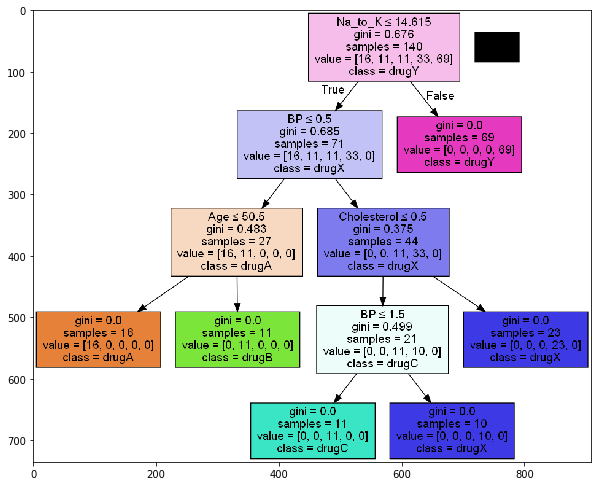

In [17]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation='nearest')